In [55]:
# %matplotlib notebook

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [57]:
filename='C:\\Users\\Admin\\Desktop\\Data\\A304_MR\\A304_150K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value'])
df['multiplier'] = 10**6
df
(df['V5'],df['V6']) = (df['V6'], df['V5'])
(df['V7'],df['V8']) = (df['V8'], df['V7'])

# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

In [58]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[["I", "B","B_int","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value', 'multiplier']].copy()
df.head()

,I,B,B_int,T,V1,V2,V3,V4,V5,V6,V7,V8,Rel_value,multiplier
0,0.001,10000.217139,10000,150.106409,6316.462504,-6315.024298,5597.694202,-5597.093125,6314.193325,-6314.611974,5595.526647,-5595.424286,-0.000002,1000000
1,0.001,9000.479053,9000,150.002177,6318.494886,-6318.347954,5601.596240,-5601.538470,6319.337837,-6319.434035,5600.563192,-5600.418072,-0.000002,1000000
2,0.001,8000.322583,8000,149.999007,6324.072561,-6323.951209,5606.901630,-5606.728815,6324.991118,-6325.053697,5605.942688,-5605.861454,-0.000002,1000000
3,0.001,7000.497021,7000,149.999897,6329.927553,-6329.821383,5612.369193,-5612.326642,6330.835019,-6330.820667,5611.506818,-5611.336972,-0.000002,1000000
4,0.001,6000.274023,6000,149.999935,6335.935132,-6335.816899,5618.032852,-5617.958531,6336.734351,-6336.801497,5617.243912,-5617.022508,-0.000002,1000000


In [59]:

df['R1'] = df['V1']/(df['multiplier']*df['I'])
df['R2'] = df['V2']/(df['multiplier']*df['I'])
df['R3'] = df['V3']/(df['multiplier']*df['I'])
df['R4'] = df['V4']/(df['multiplier']*df['I'])
df['R5'] = df['V5']/(df['multiplier']*df['I'])
df['R6'] = df['V6']/(df['multiplier']*df['I'])
df['R7'] = df['V7']/(df['multiplier']*df['I'])
df['R8'] = df['V8']/(df['multiplier']*df['I'])

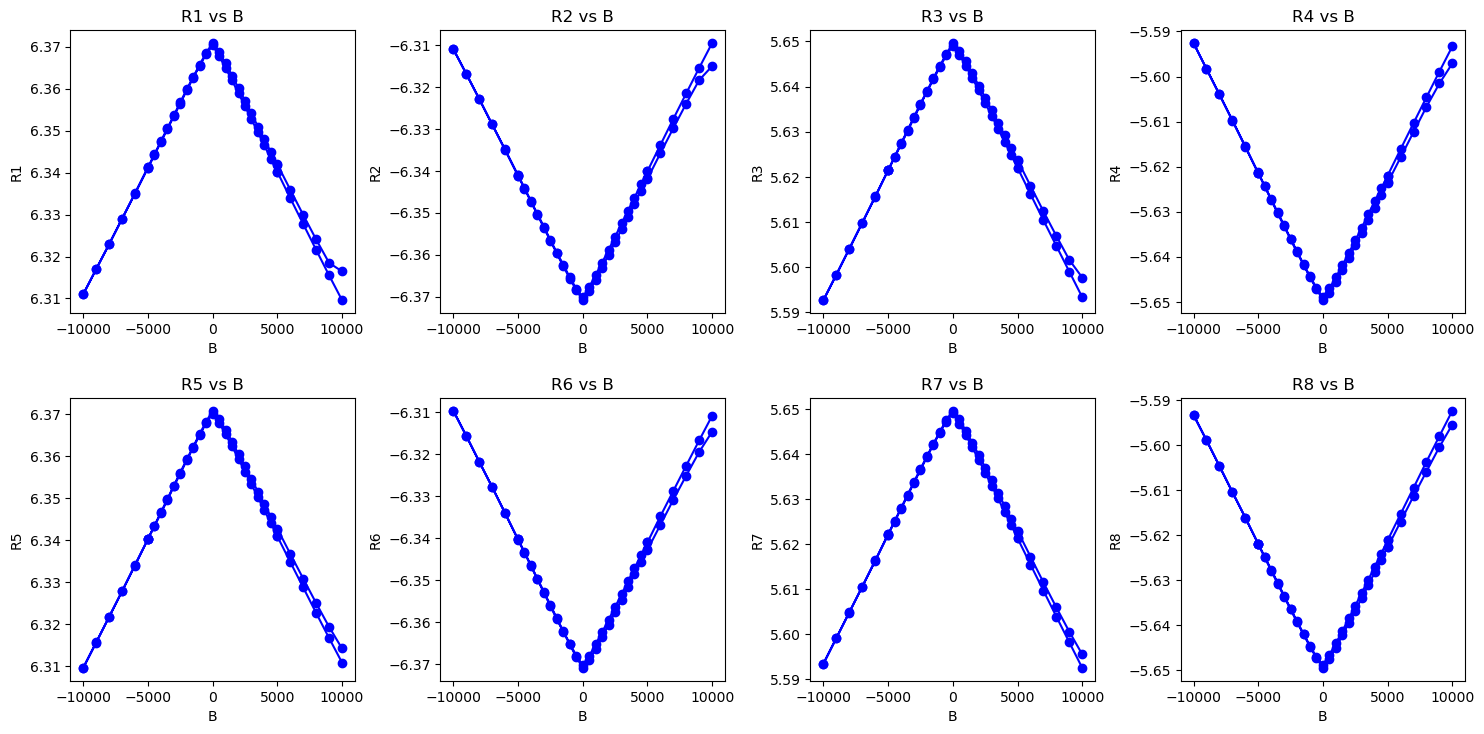

In [60]:
plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
plt.plot(df['B'],df['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')

plt.subplot(4,4,2)
plt.plot(df['B'],df['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')

plt.subplot(4,4,3)
plt.plot(df['B'],df['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(4,4,4)
plt.plot(df['B'],df['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplot(4,4,5)
plt.plot(df['B'],df['R5'], 'bo-')
plt.title('R5 vs B')
plt.ylabel('R5')
plt.xlabel('B')
plt.subplot(4,4,6)
plt.plot(df['B'],df['R6'], 'bo-')
plt.title('R6 vs B')
plt.ylabel('R6')
plt.xlabel('B')
plt.subplot(4,4,7)
plt.plot(df['B'],df['R7'], 'bo-')
plt.title('R7 vs B')
plt.ylabel('R7')
plt.xlabel('B')
plt.subplot(4,4,8)
plt.plot(df['B'],df['R8'], 'bo-')
plt.title('R8 vs B')
plt.ylabel('R8')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

In [61]:
df['Ra'] = (df['R1'] + df['R5'] - df['R2'] - df['R6'])/4
df['Rb'] = (df['R3'] + df['R7'] - df['R4'] - df['R8'])/4
df['R'] = (df['Ra'] + df['Rb'])/2

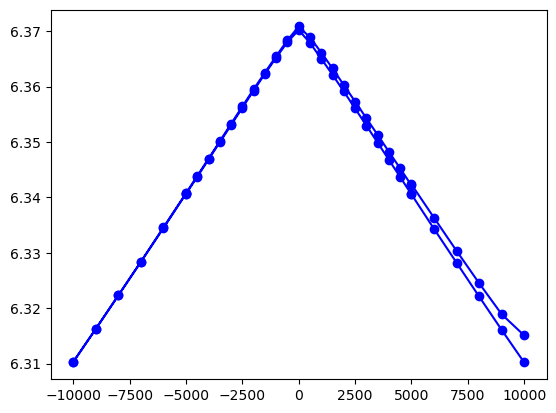

In [62]:
plt.plot(df['B_int'], df['Ra'],'bo-')

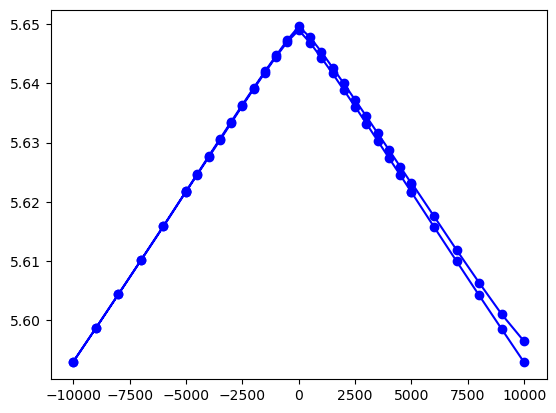

In [63]:
plt.plot(df['B_int'], df['Rb'],'bo-')
plt.show()

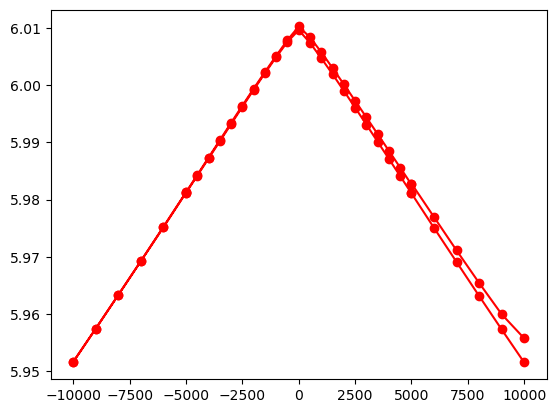

In [64]:
plt.plot(df['B_int'], df['R'], 'ro-')
plt.show()

In [65]:
# df.iloc
# df.loc
R0 = df.loc[df['B_int'] == 0]['R'].mean()
R0

6.009906787132125

In [66]:
df['MR'] = (df['R'] - R0)/R0*100

In [67]:
df[['B_int','MR']].head()

,B_int,MR
0,10000,-0.901062
1,9000,-0.830969
2,8000,-0.739926
3,7000,-0.645414
4,6000,-0.548487


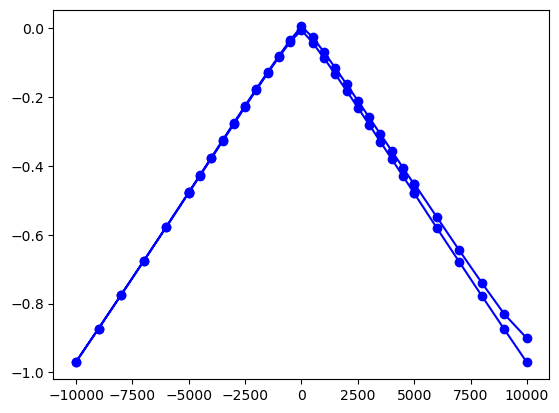

In [68]:
plt.plot(df['B_int'], df['MR'], 'bo-')

In [69]:
df.to_pickle('./pickle_data/MR_300K.pkl')

In [70]:
df['B'] = df['B_int']
df

,I,B,B_int,T,V1,V2,V3,V4,V5,V6,...,R3,R4,R5,R6,R7,R8,Ra,Rb,R,MR
0,0.001,10000,10000,150.106409,6316.462504,-6315.024298,5597.694202,-5597.093125,6314.193325,-6314.611974,...,5.597694,-5.597093,6.314193,-6.314612,5.595527,-5.595424,6.315073,5.596435,5.955754,-0.901062
1,0.001,9000,9000,150.002177,6318.494886,-6318.347954,5601.596240,-5601.538470,6319.337837,-6319.434035,...,5.601596,-5.601538,6.319338,-6.319434,5.600563,-5.600418,6.318904,5.601029,5.959966,-0.830969
2,0.001,8000,8000,149.999007,6324.072561,-6323.951209,5606.901630,-5606.728815,6324.991118,-6325.053697,...,5.606902,-5.606729,6.324991,-6.325054,5.605943,-5.605861,6.324517,5.606359,5.965438,-0.739926
3,0.001,7000,7000,149.999897,6329.927553,-6329.821383,5612.369193,-5612.326642,6330.835019,-6330.820667,...,5.612369,-5.612327,6.330835,-6.330821,5.611507,-5.611337,6.330351,5.611885,5.971118,-0.645414
4,0.001,6000,6000,149.999935,6335.935132,-6335.816899,5618.032852,-5617.958531,6336.734351,-6336.801497,...,5.618033,-5.617959,6.336734,-6.336801,5.617244,-5.617023,6.336322,5.617564,5.976943,-0.548487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.001,6000,6000,150.000141,6333.922456,-6333.836934,5616.181835,-5616.133169,6334.792339,-6334.751193,...,5.616182,-5.616133,6.334792,-6.334751,5.615474,-5.615320,6.334326,5.615777,5.975051,-0.579965
62,0.001,7000,7000,150.000229,6327.752937,-6327.626123,5610.396847,-5610.342748,6328.730674,-6328.722997,...,5.610397,-5.610343,6.328731,-6.328723,5.609684,-5.609497,6.328208,5.609980,5.969094,-0.679087
63,0.001,8000,8000,150.000349,6321.593283,-6321.502833,5604.697359,-5604.604621,6322.642157,-6322.677359,...,5.604697,-5.604605,6.322642,-6.322677,5.603912,-5.603680,6.322104,5.604224,5.963164,-0.777766
64,0.001,9000,9000,150.000784,6315.516325,-6315.446129,5599.010226,-5598.910327,6316.680929,-6316.682030,...,5.599010,-5.598910,6.316681,-6.316682,5.598207,-5.598005,6.316081,5.598533,5.957307,-0.875215


In [71]:
df['V1'] = (df['V1'] - df['V2'])/2
df['V2'] = (df['V3'] - df['V4'])/2
df['V3'] = (df['V5'] - df['V6'])/2
df['V4'] = (df['V7'] - df['V8'])/2

In [72]:
df = df[['I','B','V1','V2','V3','V4',"multiplier"]].copy()
df

,I,B,V1,V2,V3,V4,multiplier
0,0.001,10000,6315.743401,5597.393663,6314.402650,5595.475466,1000000
1,0.001,9000,6318.421420,5601.567355,6319.385936,5600.490632,1000000
2,0.001,8000,6324.011885,5606.815223,6325.022408,5605.902071,1000000
3,0.001,7000,6329.874468,5612.347918,6330.827843,5611.421895,1000000
4,0.001,6000,6335.876016,5617.995692,6336.767924,5617.133210,1000000
...,...,...,...,...,...,...,...
61,0.001,6000,6333.879695,5616.157502,6334.771766,5615.396746,1000000
62,0.001,7000,6327.689530,5610.369798,6328.726836,5609.590963,1000000
63,0.001,8000,6321.548058,5604.650990,6322.659758,5603.796182,1000000
64,0.001,9000,6315.481227,5598.960277,6316.681479,5598.105816,1000000


In [73]:
min_B = df['B'].min()
max_B = df['B'].max()
print(min_B, max_B)

-10000 10000


In [74]:
B_min_idx = 0
for i in range(len(df)):
    if(df['B'].iloc[i]== min_B): 
        B_min_idx = i
        break

### Creating dec dataset

In [75]:
df_dec = df.iloc[ : B_min_idx+1].copy()
df_inc = df.iloc[B_min_idx+1 : ].copy()

data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1)

data_dec = data_dec[data_dec['B_x'] == -1*data_dec['B_y']] # selecting 

data_dec = data_dec[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [76]:
data_dec['V15'] = (data_dec['V1'] + data_dec['V5'])/2
data_dec['V26'] = (data_dec['V2'] + data_dec['V6'])/2
data_dec['V37'] = (data_dec['V3'] + data_dec['V7'])/2
data_dec['V48'] = (data_dec['V4'] + data_dec['V8'])/2

In [77]:
data_dec['Ra'] = (data_dec['V15'] + data_dec['V37'])/(2*data_dec['I']*data_dec['multiplier'])
data_dec['Rb'] = (data_dec['V26'] + data_dec['V48'])/(2*data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['Ra'] + data_dec['Rb'])/2

### Creating Increasing Dataset

In [78]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1)

data_inc = data_inc[data_inc['B_x'] == -1*data_inc['B_y']] # selecting 

data_inc = data_inc[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [79]:
data_inc['V15'] = (data_inc['V1'] + data_inc['V5'])/2
data_inc['V26'] = (data_inc['V2'] + data_inc['V6'])/2
data_inc['V37'] = (data_inc['V3'] + data_inc['V7'])/2
data_inc['V48'] = (data_inc['V4'] + data_inc['V8'])/2

In [80]:
data_inc['Ra'] = (data_inc['V15'] + data_inc['V37'])/(2*data_inc['I']*data_inc['multiplier'])
data_inc['Rb'] = (data_inc['V26'] + data_inc['V48'])/(2*data_inc['I']*data_inc['multiplier'])
data_inc['R'] = (data_inc['Ra'] + data_inc['Rb'])/2

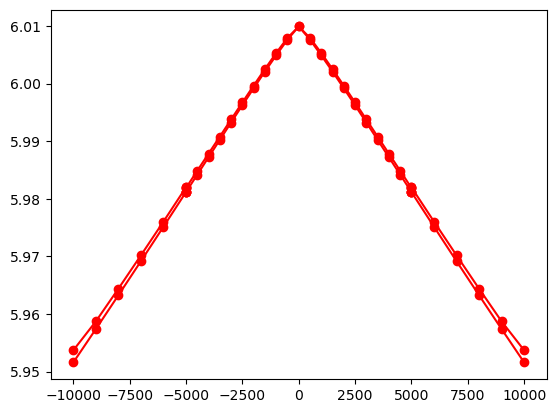

In [81]:

plt.plot(data_dec['B'],data_dec['R'], 'ro-')
plt.plot(data_inc['B'],data_inc['R'], 'ro-')